In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import datetime as dt

In [7]:
train = pd.read_csv('train-sample.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140272 entries, 0 to 140271
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   PostId                               140272 non-null  int64 
 1   PostCreationDate                     140272 non-null  object
 2   OwnerUserId                          140272 non-null  int64 
 3   OwnerCreationDate                    140272 non-null  object
 4   ReputationAtPostCreation             140272 non-null  int64 
 5   OwnerUndeletedAnswerCountAtPostTime  140272 non-null  int64 
 6   Title                                140272 non-null  object
 7   BodyMarkdown                         140272 non-null  object
 8   Tag1                                 140262 non-null  object
 9   Tag2                                 113021 non-null  object
 10  Tag3                                 75914 non-null   object
 11  Tag4                      

In [9]:
train['OpenStatus'] = np.where(train['PostClosedDate'] == "", 1, 0)

In [10]:
print(train['OpenStatus'].value_counts())

OpenStatus
0    140272
Name: count, dtype: int64


/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_32418/2639827352.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['ReputationAtPostCreation'], shade=True)


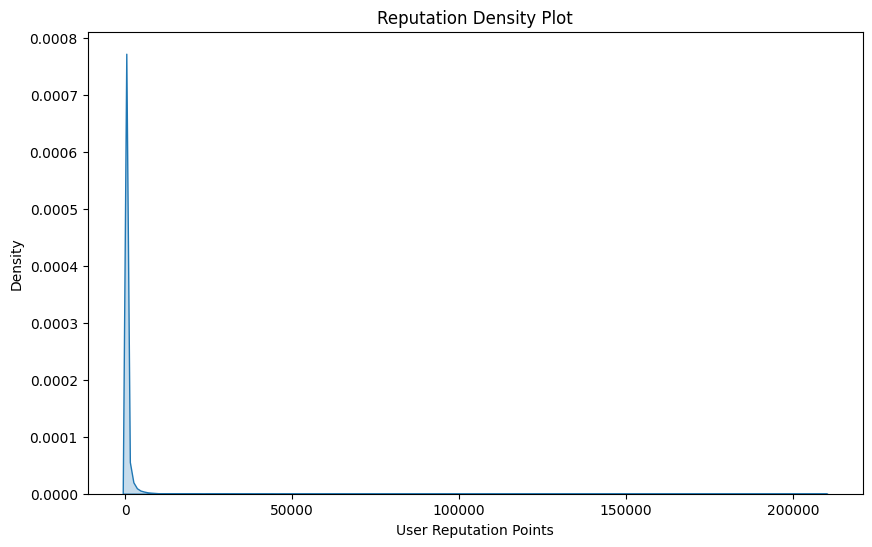

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train['ReputationAtPostCreation'], shade=True)
plt.xlabel('User Reputation Points')
plt.ylabel('Density')
plt.title('Reputation Density Plot')
plt.show()

In [12]:
conditions = [
    (train['ReputationAtPostCreation'] >= 20000),
    (train['ReputationAtPostCreation'] < 20000) & (train['ReputationAtPostCreation'] >= 1000),
    (train['ReputationAtPostCreation'] < 1000) & (train['ReputationAtPostCreation'] >= 200),
    (train['ReputationAtPostCreation'] < 200)
]
choices = ['Trusted', 'Established', 'Avid', 'New']
train['MembershipStatus'] = np.select(conditions, choices)

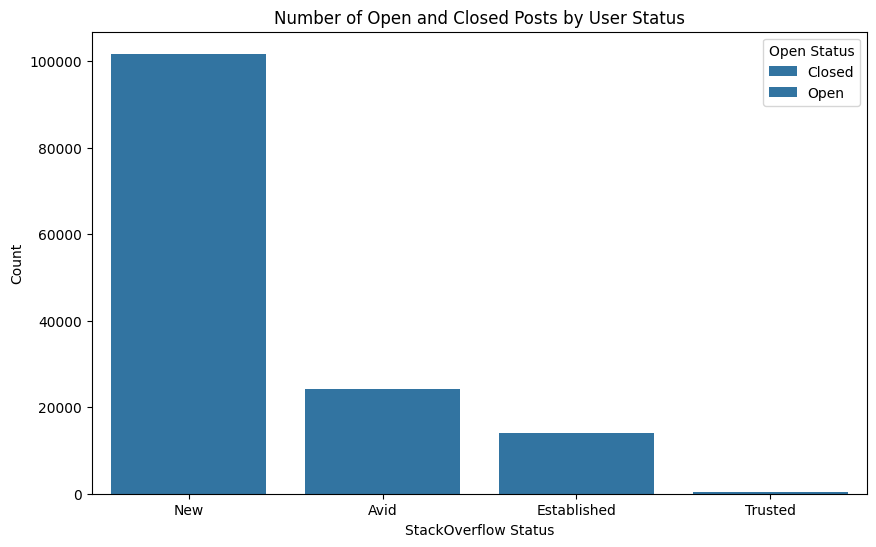

In [13]:
# Cell 8: Plot Number of Open and Closed Posts by User Status
plt.figure(figsize=(10, 6))
sns.countplot(x='MembershipStatus', hue='OpenStatus', data=train)
plt.xlabel('StackOverflow Status')
plt.ylabel('Count')
plt.title('Number of Open and Closed Posts by User Status')
plt.legend(title='Open Status', labels=['Closed', 'Open'])
plt.show()

In [14]:
# Cell 9: Convert PostCreationDate to day of week
train['PostCreationDate'] = pd.to_datetime(train['PostCreationDate'])
train['Day'] = train['PostCreationDate'].dt.day_name()

In [15]:
# Cell 10: Order days of week appropriately
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
train['Day'] = pd.Categorical(train['Day'], categories=days, ordered=True)

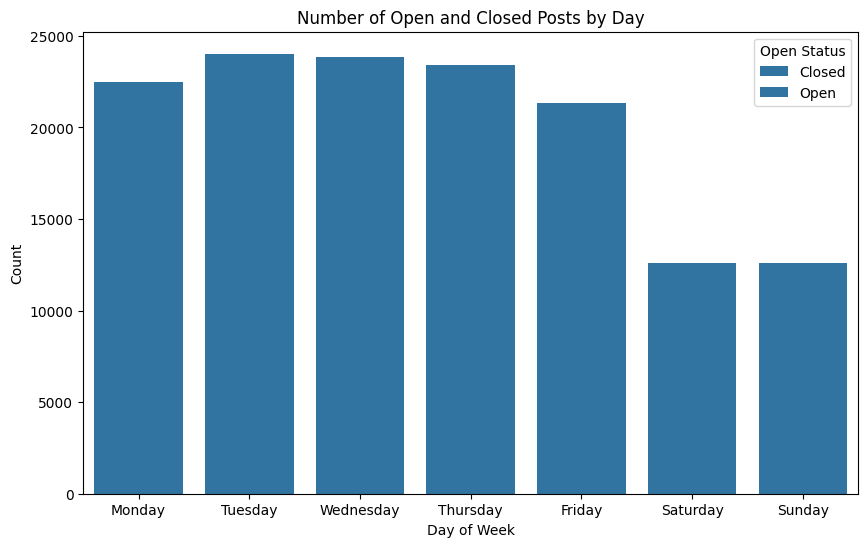

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', hue='OpenStatus', data=train)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Open and Closed Posts by Day')
plt.legend(title='Open Status', labels=['Closed', 'Open'])
plt.show()


In [17]:
# Cell 12: Create isWeekend feature
train['isWeekend'] = train['Day'].isin(['Saturday', 'Sunday']).astype(int)


In [18]:
# Cell 13: Convert PostCreationDate to month
train['Month'] = train['PostCreationDate'].dt.month_name()


In [19]:
# Cell 14: Order months appropriately
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
train['Month'] = pd.Categorical(train['Month'], categories=months, ordered=True)

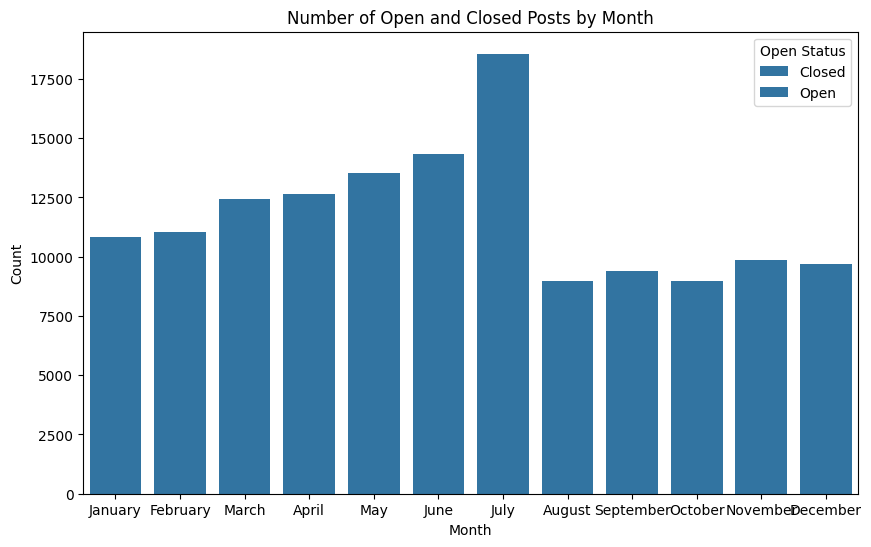

In [20]:
# Cell 15: Plot Number of Open and Closed Posts by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='OpenStatus', data=train)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Open and Closed Posts by Month')
plt.legend(title='Open Status', labels=['Closed', 'Open'])
plt.show()

In [21]:
# Cell 16: Convert PostCreationDate to year
train['Year'] = train['PostCreationDate'].dt.year

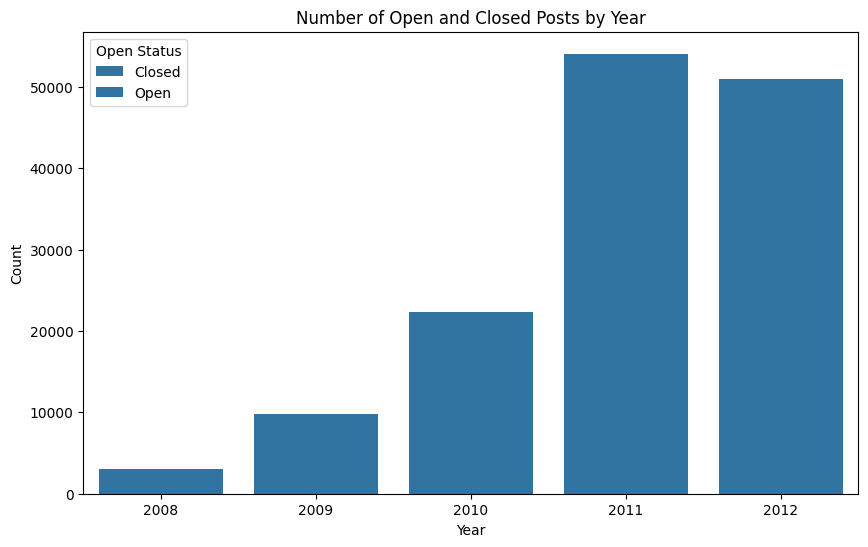

In [22]:
# Cell 17: Plot Number of Open and Closed Posts by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='OpenStatus', data=train)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Open and Closed Posts by Year')
plt.legend(title='Open Status', labels=['Closed', 'Open'])
plt.show()

In [23]:
# Cell 18: Grab the five tag columns
tag_columns = ['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5']
tag_counts = train[tag_columns]

In [24]:
# Cell 19: Convert to vector of tags
aggregated_counts = pd.Series(tag_counts.values.ravel()).value_counts()
aggregated_counts = aggregated_counts.drop(index='', errors='ignore')  # Remove empty tag


/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_32418/1978139112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_tags.values, y=top_25_tags.index, palette="viridis")


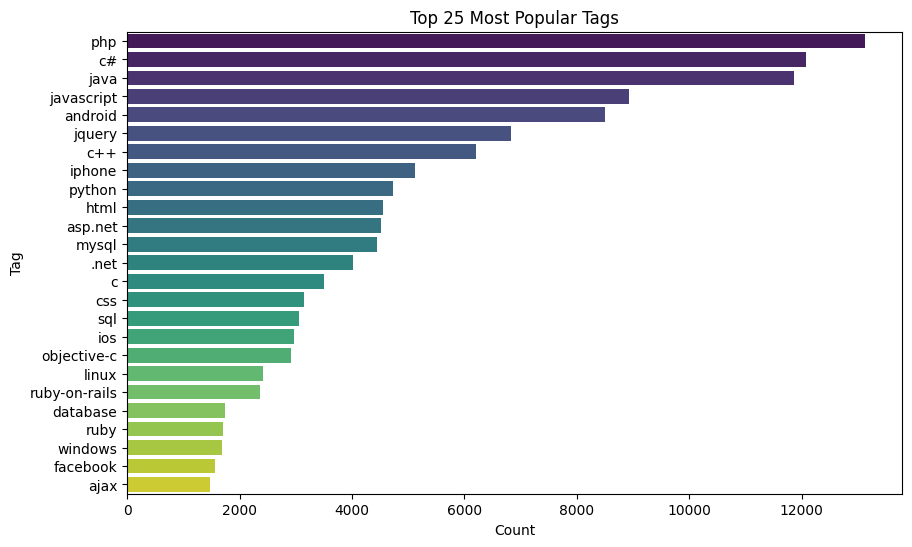

In [25]:
# Cell 20: Plot Top 25 Most Popular Tags
top_25_tags = aggregated_counts.head(25)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_tags.values, y=top_25_tags.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Tag')
plt.title('Top 25 Most Popular Tags')
plt.show()

In [26]:
# Cell 21: Summary statistics for tag counts
print(aggregated_counts.describe())


count    18308.000000
mean        21.005080
std        228.573925
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      13134.000000
Name: count, dtype: float64


In [27]:
# Cell 22: Filter aggregated_counts where N > 25 and take log of N
aggregated_counts = aggregated_counts[aggregated_counts > 25].apply(np.log10)


/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_32418/3771036011.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aggregated_counts, shade=True)


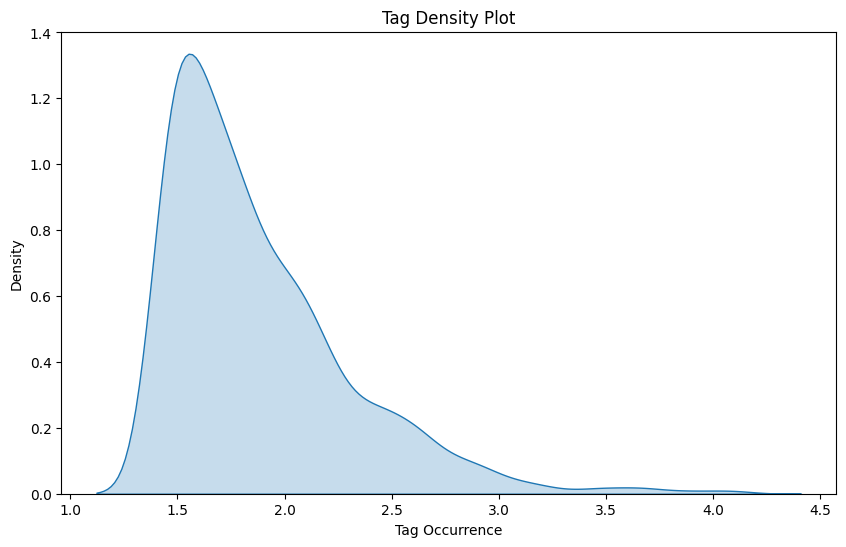

In [28]:
# Cell 23: Plot Tag Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(aggregated_counts, shade=True)
plt.xlabel('Tag Occurrence')
plt.ylabel('Density')
plt.title('Tag Density Plot')
plt.show()


In [29]:
# Cell 24: Calculate breaks and assign labels
breaks = [aggregated_counts.min(), aggregated_counts.mean(), aggregated_counts.quantile(0.75), aggregated_counts.max()]
labels = ["Unpopular", "Moderate", "Popular"]
aggregated_counts_labels = pd.cut(aggregated_counts, bins=breaks, labels=labels, include_lowest=True)


In [30]:
# Cell 25: Merge TagPopularity back to original dataframe
aggregated_counts_df = aggregated_counts.reset_index()
aggregated_counts_df.columns = ['Tag', 'LogCount']
aggregated_counts_df['TagPopularity'] = aggregated_counts_labels.values
train = train.merge(aggregated_counts_df[['Tag', 'TagPopularity']], left_on='Tag1', right_on='Tag', how='left')


In [31]:
# Cell 26: Calculate account age
from dateutil import parser

# Function to parse dates with mixed formats
def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return None

# Apply the parse_date function to the 'OwnerCreationDate' column
train['OwnerCreationDate'] = train['OwnerCreationDate'].apply(parse_date)

# Drop rows where date parsing failed (if any)
train = train.dropna(subset=['OwnerCreationDate'])

# Calculate account age
train['Age'] = 2012 - train['OwnerCreationDate'].dt.year

# Verify the changes
train[['OwnerCreationDate', 'Age']].head()


,OwnerCreationDate,Age
0,2010-09-17 10:15:06,2
1,2010-10-03 09:30:58,2
2,2010-07-22 16:58:20,2
3,2011-07-19 10:22:40,1
4,2011-02-04 18:05:34,1


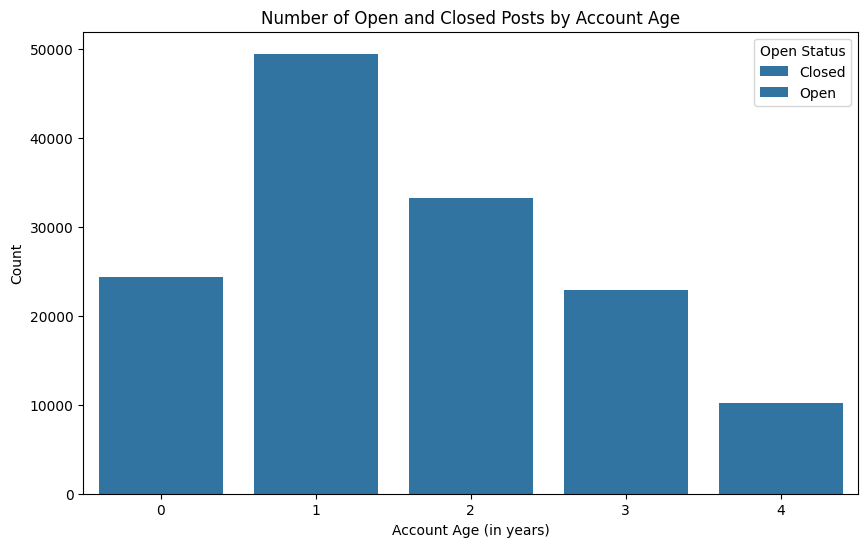

In [32]:
# Cell 27: Plot Number of Open and Closed Posts by Account Age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='OpenStatus', data=train)
plt.xlabel('Account Age (in years)')
plt.ylabel('Count')
plt.title('Number of Open and Closed Posts by Account Age')
plt.legend(title='Open Status', labels=['Closed', 'Open'])
plt.show()

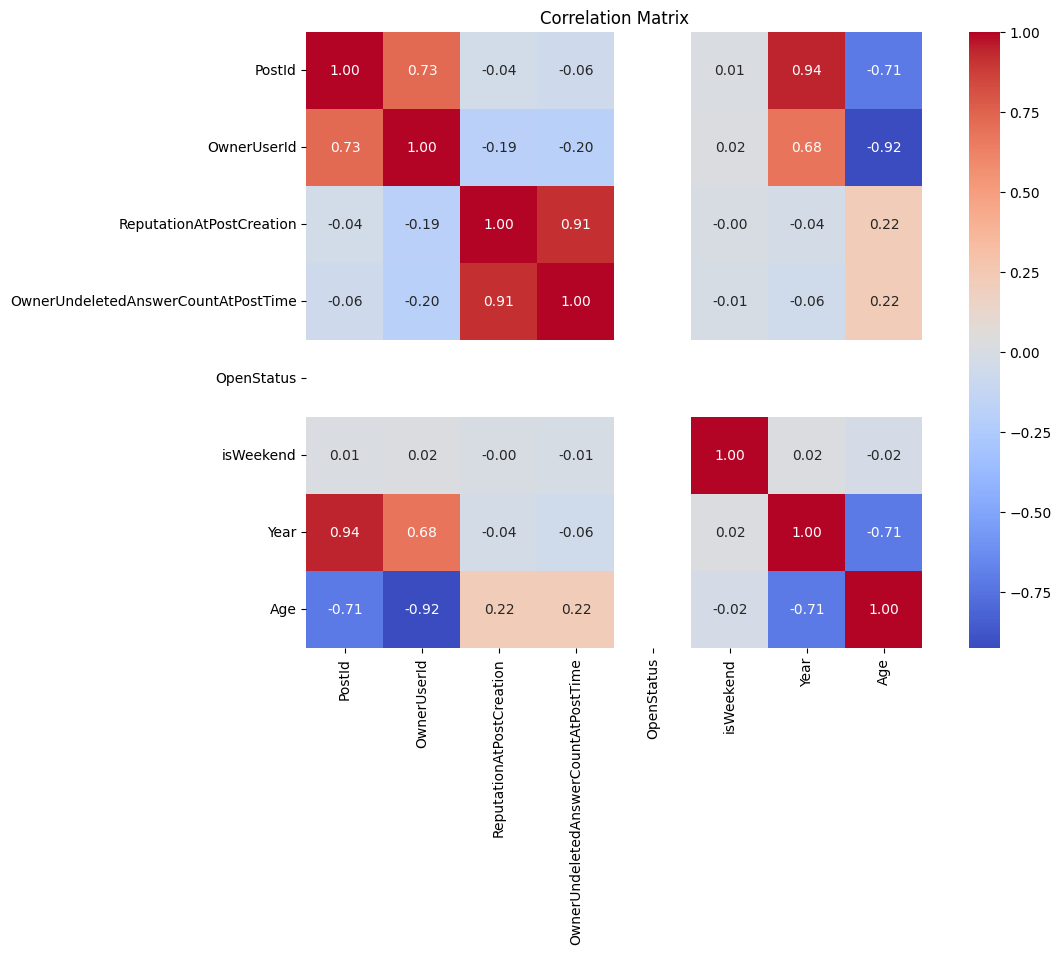

In [33]:
# Cell 28: Correlation plot (excluding categorical variables)
numeric_features = train.select_dtypes(include=[np.number])
cor_data = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_data, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Cell 29: Prepare data for model training

# List of columns to drop if they exist
columns_to_drop = ['OwnerUndeletedAnswerCountAtPostTime', 'NumberOfWordsInBody']

# Drop columns that exist in the DataFrame
train.drop(columns=[col for col in columns_to_drop if col in train.columns], inplace=True)

# Verify the changes
train.head()


,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,...,PostClosedDate,OpenStatus,MembershipStatus,Day,isWeekend,Month,Year,Tag,TagPopularity,Age
0,6046168,2011-05-18 14:14:05,543315,2010-09-17 10:15:06,1,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,...,NaN,0,New,Wednesday,0,May,2011,mongodb,Popular,2
1,4873911,2011-02-02 11:30:10,465076,2010-10-03 09:30:58,192,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,...,NaN,0,New,Wednesday,0,February,2011,dom,Popular,2
2,3311559,2010-07-22 17:21:54,406143,2010-07-22 16:58:20,1,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,...,NaN,0,New,Thursday,0,July,2010,sql-server,Popular,2
3,9990413,2012-04-03 09:18:39,851755,2011-07-19 10:22:40,4,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,...,04/15/2012 21:12:48,0,New,Tuesday,0,April,2012,php,Popular,1
4,10421966,2012-05-02 21:25:01,603588,2011-02-04 18:05:34,334,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,...,NaN,0,Avid,Wednesday,0,May,2012,mongodb,Popular,1


In [35]:
# Cell 30: Split data into training and testing sets
X = train.drop(columns=['OpenStatus'])
y = train['OpenStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
# Cell 31: Train random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Check the column names
print(train.columns)

# Assume the correct column names for dates
post_creation_date_col = 'PostCreationDate'  # Replace with actual column name if different
owner_creation_date_col = 'OwnerCreationDate'  # Replace with actual column name if different

# Convert datetime columns to numeric features if they exist
if post_creation_date_col in train.columns:
    train[post_creation_date_col] = pd.to_datetime(train[post_creation_date_col])
    train['PostCreationYear'] = train[post_creation_date_col].dt.year
    train['PostCreationMonth'] = train[post_creation_date_col].dt.month
    train['PostCreationDay'] = train[post_creation_date_col].dt.day
    train.drop(columns=[post_creation_date_col], inplace=True)

if owner_creation_date_col in train.columns:
    train[owner_creation_date_col] = pd.to_datetime(train[owner_creation_date_col])
    train['OwnerCreationYear'] = train[owner_creation_date_col].dt.year
    train['OwnerCreationMonth'] = train[owner_creation_date_col].dt.month
    train['OwnerCreationDay'] = train[owner_creation_date_col].dt.day
    train.drop(columns=[owner_creation_date_col], inplace=True)

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

# Define feature columns and target column
feature_cols = [col for col in train.columns if col != 'OpenStatus']
X = train[feature_cols]
y = train['OpenStatus']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train random forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Check model performance
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Index(['PostId', 'PostCreationDate', 'OwnerUserId', 'OwnerCreationDate',
       'ReputationAtPostCreation', 'Title', 'BodyMarkdown', 'Tag1', 'Tag2',
       'Tag3', 'Tag4', 'Tag5', 'PostClosedDate', 'OpenStatus',
       'MembershipStatus', 'Day', 'isWeekend', 'Month', 'Year', 'Tag',
       'TagPopularity', 'Age'],
      dtype='object')


: 